# Part II - Prosper Loan Data Analysis

## by Christina Elele

## Investigation Overview


In this investigation, I wanted to look at the characteristics of loans that could be used to predict their borrower APR. The main focus was on the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income.



## Dataset Overview

The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status, etc.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosper_loan_data.csv')


In [3]:
# Subsetting the dataframe by selecting our features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'LoanStatus', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
subset_loan = loan[cols]

# Removing loans with missing borrower APR information
subset_loan = subset_loan[~subset_loan.BorrowerAPR.isna()]

# Removing outliers i.e. loans with stated monthly income greater than 30,000
subset_loan = subset_loan[subset_loan.StatedMonthlyIncome<=30000]

# Converting ProsperRating into an ordered categorical type
rating_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rating_order)
subset_loan['ProsperRating (Alpha)'] = subset_loan['ProsperRating (Alpha)'].astype(ordered_var)

#Converting Employment Status into an ordered categorical type

employ_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = employ_order)
subset_loan['EmploymentStatus'] = subset_loan['EmploymentStatus'].astype(ordered_var)
subset_loan.shape

(113585, 7)

## Which Credit Rating has the highest number of borrowers?

Most borrowers have a credit rating of C. This means that majority of the people who take loans on the prosper marketplace fall within the "C" Prosper Rating category.

In [4]:
# Replacing No Credit (NC) with High Risk (HR)
loan['CreditGrade'].replace(['NC', 'HR'], 'E', inplace = True)

# filling NAN values with empty strings
loan['ProsperRating (Alpha)'].fillna("", inplace = True)
loan['CreditGrade'].fillna("", inplace = True)

# combining credit ratings with prosper rating
loan['ProsperRatingCombined'] = loan['ProsperRating (Alpha)'] + loan['CreditGrade']

# dropping rows without any credit rating
loan = loan.query(' ProsperRatingCombined != ""')

# convert string to ordinal category type

ProsperRatingCombined_cat = ['HR','E', 'D', 'C', 'B', 'A', 'AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRatingCombined_cat)
loan['ProsperRatingCombined'] = loan['ProsperRatingCombined'].astype(ordered_var)

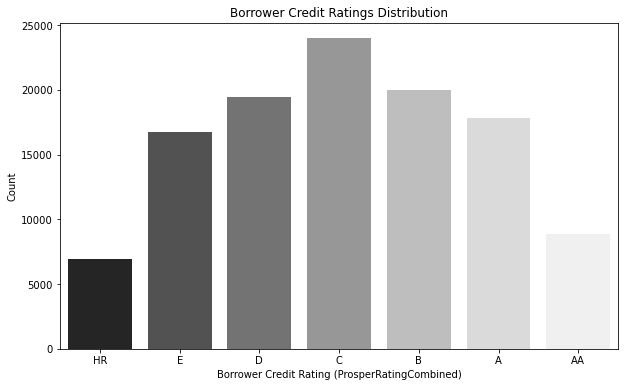

In [5]:
plt.figure(figsize = [10, 6])
sns.countplot(data = loan, x = 'ProsperRatingCombined', palette = "Greys_r")
plt.xlabel('Borrower Credit Rating (ProsperRatingCombined)')
plt.ylabel('Count')
plt.title('Borrower Credit Ratings Distribution');

## Borrowers in which Income Range takes the most loans?
Surprisingly, people with incomes between USD 25,000-49,999 borrowed the most closely followed by those within the USD 50,000-74,999 income range. I would have thought that people with the least income between $0 and USD 24,999 would take more loans to meet their daily needs. But it looks like they had the least borrowings. 

In [6]:
#Combining not employed, not displayed and $0 into one category
loan['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

# creating ordinal categories for income
ord_rating = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ord_rating)
loan['IncomeRange'] = loan['IncomeRange'].astype(ordered_var)

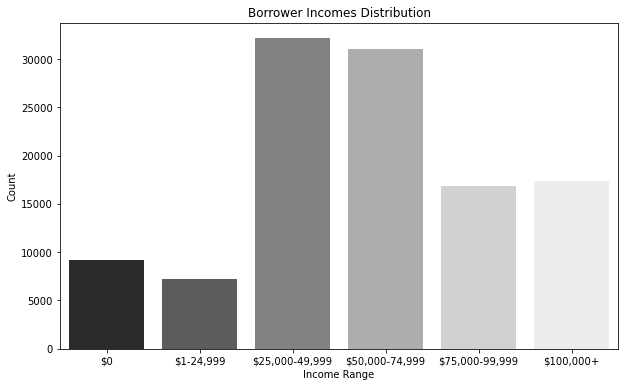

In [7]:
# bar chart
plt.figure(figsize = [10, 6])
sns.countplot(data = loan, x = 'IncomeRange', palette = "Greys_r")
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Borrower Incomes Distribution');

## What percentage of monthly income do most borrowers use to finance their loans?

Income range is not the only determinant for credit rating on Prosper. Debt to Income ratio is also a determinant. No investor wants to give out loans to someone who has already taken too much loans and is just taking more to repay the others. Basically, people who are financing old loans with new loans. Investors want to be sure that the only lend to people who's income (after settling other debts) would be enough to cover the new loan they're taking.

From our plot, we can see that the majority of borrowers are able to finance their loans using just about 20% of their monthly incomes. There are also borrowers who would need to expend up to 90% of their incomes to finance their loans. An investor would be likely to lend more to those who can finance their loans with 50% or less of their monthly income than they would lend to those who need above this percentage of income to repay their debt.

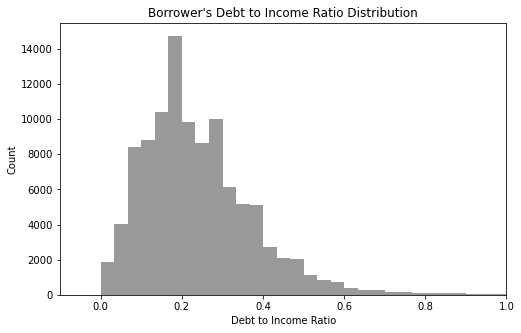

In [8]:
# distribution plot
plt.figure(figsize = [8,5])
sns.distplot(loan.DebtToIncomeRatio, kde = False, bins = 300, color = 'black')
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title("Borrower's Debt to Income Ratio Distribution");

## What effect does borrower's income and credit rating have on the estimated return of a loan?

From the violin plots, we can see that as the borrower's income rises, the median estimated return falls. The credit rating violin plot makes this a lot more visible. As a borrower's credit rating increases, the median estimated return decreases greatly.

We can assume that as income increases, the ability to repay the loan also increases, so to adjust for the higher risk, the interest rate for the loan also increases.

Also, creditors typically compete for these high income borrowers which pushes the highest credit rating interest rates down.

It's exciting to see that the width of the violin plot shrinks as credit rating increases. This suggests that the expected returns for this feature is much more predictable in comparison with the lower credit ratings.

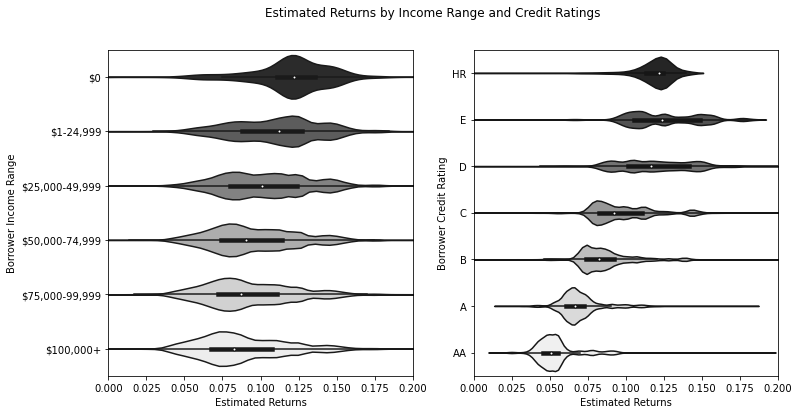

In [9]:
# Violin plots
plt.figure(figsize = [12, 6])

plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.violinplot(data = loan, y = 'IncomeRange', x = 'EstimatedReturn', palette = "Greys_r", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Borrower Income Range')
plt.xlabel('Estimated Returns')

plt.subplot(1, 2, 2)
base_color = sns.color_palette()[0]
sns.violinplot(data = loan, y = 'ProsperRatingCombined', x = 'EstimatedReturn', palette = "Greys_r", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Borrower Credit Rating')
plt.xlabel('Estimated Returns')

plt.suptitle('Estimated Returns by Income Range and Credit Ratings');

## What effect does a borrower's income and credit rating have on the Actual Returns of a loan?
These violin plots suggest that investing in borrowers without any income and with the highest credit ratings will produce the highest returns. One might be left to wonder how this set of borrowers would be able to fully repay their loans. There might be a lot more other factors to consider.

In [10]:
# simplify the actual return formula
loan['ActualReturns'] = loan.LP_CustomerPayments - loan.LoanOriginalAmount - (loan.LP_ServiceFees + loan.LP_CollectionFees + loan.LP_NetPrincipalLoss)
loan['ActualReturns'] = 1 + (loan.ActualReturns / loan.LoanOriginalAmount)

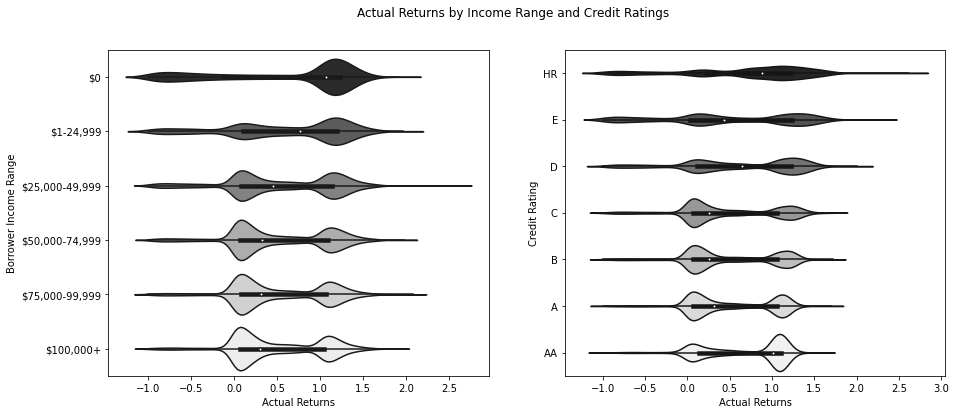

In [11]:
# line plots for income range and credit rating
plt.figure(figsize = [15, 6])

plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.violinplot(data = loan, y = 'IncomeRange', x = 'ActualReturns', palette = "Greys_r", showfliers = False)

plt.ylabel('Borrower Income Range')
plt.xlabel('Actual Returns')


plt.subplot(1, 2, 2)
base_color = sns.color_palette()[0]
sns.violinplot(data = loan, y = 'ProsperRatingCombined', x = 'ActualReturns', palette = "Greys_r", showfliers = False)

plt.ylabel('Credit Rating')
plt.xlabel('Actual Returns')

plt.suptitle('Actual Returns by Income Range and Credit Ratings');

## How does a borrower's Credit Rating affect their Income and Estimated Returns on loans?
From the FacetGrid above, we continue to see that as the credit ratings and incomes reduce, the estimated returns on loans increases. It's great to see that the income range of a borrower does not have much effect on the estimated returns by credit rating category.

For credit ratings 'AA', 'A', 'B', and 'HR', we don't see any difference in the rate of return for income ranges USD 1-100k+. But, there is an increase in returns for the $\0 income range across all the credit rating categories.

For credit ratings 'C', 'D', and 'E', we can see some difference but the median return is still within +-1% (except the $0 category).

Credit ratings seems to be a better determinant of estimated returns.

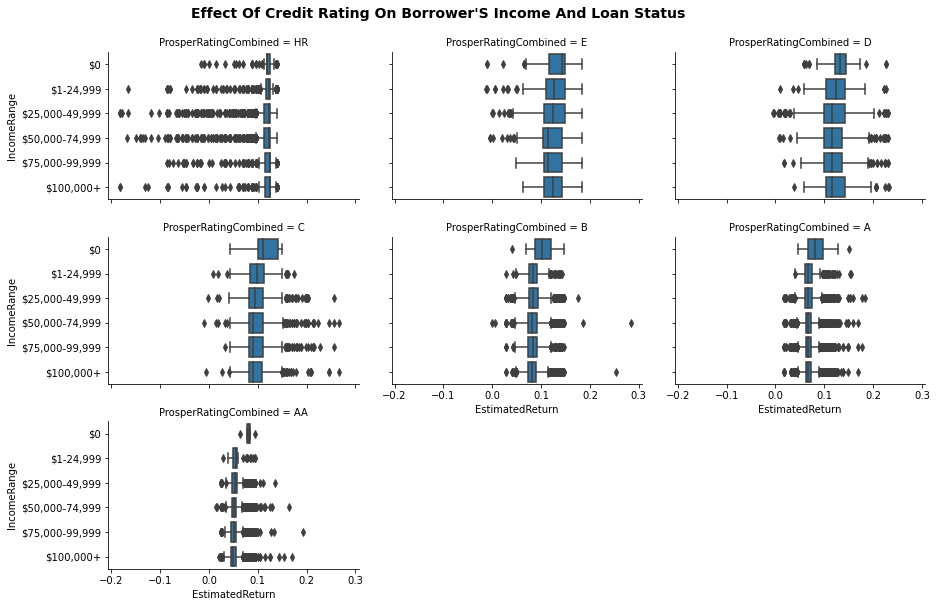

In [12]:
# create a Pair grid of estimated returns

g = sns.FacetGrid(data = loan, col = 'ProsperRatingCombined', size = 3, margin_titles = True, col_wrap = 3)
g.map(sns.boxplot, 'EstimatedReturn', 'IncomeRange');

plt.suptitle("Effect of Credit Rating on Borrower's Income and Loan Status".title(),
            fontsize=14, weight='bold', y= 1.04)
# set plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14,8);

## What effect does Actual and Estimated Returns have on Credit Ratings and Loan Status?

**Defaulted Loans:** From the plots above, there's no relationship between estimated returns and the calculated actual return of the loans.

**Chargedoff loans:** There's also no relationship between estimated returns and actual returns for this set of loans across all credit ratings and income ranges.

**Current Loans:** We can see a slightly linear relationship between the estimated returns and actual returns. This means that if the estimated return on a loan increases, there's a small chance that the actual return on the loan will also increase and vice versa.

**Completed Loans:** For this set of loans, we can see that there is an obvious linear relationship between estimated returns and actual returns. What this means is that regardless of the return that was estimated for a particular loan, there's a possibility that the loan will always be fully paid. The reason for this might be because some borrowers repay their loans early before the due date of the loans. Hence, reducing the amount of interest they pay on their loans.

NB: We only looked at four loan statuses in our explanation.

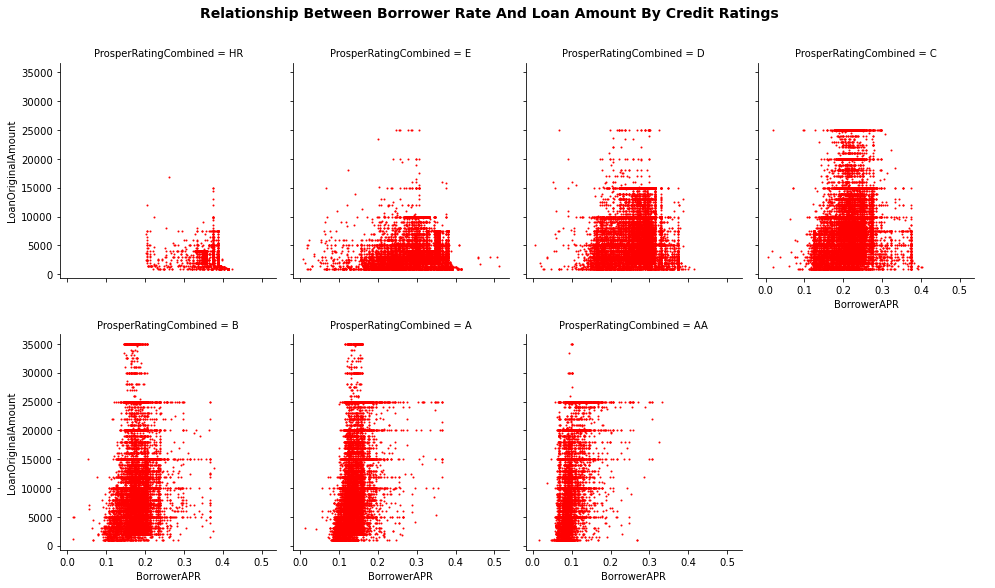

In [13]:
# Prosper rating effect on borrower APR and loan amount

g=sns.FacetGrid(loan, col="ProsperRatingCombined", col_wrap=4).map(plt.scatter, "BorrowerAPR", "LoanOriginalAmount", s=1, color='red').add_legend();
plt.suptitle('Relationship between Borrower Rate and Loan Amount by Credit ratings'.title(),
            fontsize=14, weight='bold', y= 1.04)
## set plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14,8);

## SUMMARY OF FINDINGS

This investigation was focused on exploring the relationship among several features that determine a borrower's APR and loan performance on the Prosper Loan marketplace. Our exploration revealed the following:
- Most of the borrowers who took loans on the platform had a credit rating of 'C'. This tells us that you do not necessarily need to have the highest credit rating to obtain a loan on the platform.
- Borrowers whose incomes fell between USD 50,000 and USD 49,999 borrowed the most while those within the USD 0-24,999 income range borrowed the least.

- The majority of borrowers on the platform are able to repay their loans using just 20% of their monthly income.
- An increase in a borrower's income will lead to a decrease in the estimated return for their loan, and an increase in their credit rating will lead to a decrease in the estimated return as well and vice versa.
- Investing in borrowers with no income and with the highest credit rating will yield the highest returns.
- There's no relationship between estimated returns and actual returns across all credit ratings and income ranges for **chargedoff** and **defaulted** loans. For **current loans**, there's a slightly linear relationship between both variables, and for **completed loans**, there is a clear linear relationship between both.

In [ ]:
!jupyter nbconvert 'prosper_loan_data_slide_part2'.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook prosper_loan_data_slide_part2.ipynb to slides
[NbConvertApp] Writing 990487 bytes to prosper_loan_data_slide_part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/prosper_loan_data_slide_part2.slides.html
Use Control-C to stop this server
